# Experiment: Skin scattering

We collect a sample of skin in pieces.

## Objective

Assessing Raman Scattering of the skin

In [1]:
from pathlib import Path
from raman.sample import read_txt, Sample, accumulate
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps
cmap = colormaps['cividis']

def add_plot_label():
    plt.xlabel("Raman Shift (cm^-1)")
    plt.ylabel("Intensity")
    plt.grid()

BASE_PATH:Path = Path("/app")

## 1. Skin1

The first spot of the skin

0 /app/data/skin/txt/skin1_600_785 nm_30 s_1_2024_12_09_13_41_06_01.txt
Found 1 spike(s) in path=/app/data/skin/txt/skin1_600_785 nm_30 s_1_2024_12_09_13_41_06_01.txt, self.remove_spike() is perform automatically.
1 /app/data/skin/txt/skin1_600_785 nm_30 s_1_2024_12_09_13_41_45_01.txt
Found 2 spike(s) in path=/app/data/skin/txt/skin1_600_785 nm_30 s_1_2024_12_09_13_41_45_01.txt, self.remove_spike() is perform automatically.
2 /app/data/skin/txt/skin1_600_785 nm_30 s_1_2024_12_09_13_42_18_01.txt
Found 1 spike(s) in path=/app/data/skin/txt/skin1_600_785 nm_30 s_1_2024_12_09_13_42_18_01.txt, self.remove_spike() is perform automatically.
3 /app/data/skin/txt/skin1_600_785 nm_30 s_1_2024_12_09_13_42_50_01.txt
Found 1 spike(s) in path=/app/data/skin/txt/skin1_600_785 nm_30 s_1_2024_12_09_13_42_50_01.txt, self.remove_spike() is perform automatically.
4 /app/data/skin/txt/skin1_600_785 nm_30 s_1_2024_12_09_13_43_25_01.txt
Found 2 spike(s) in path=/app/data/skin/txt/skin1_600_785 nm_30 s_1_2024

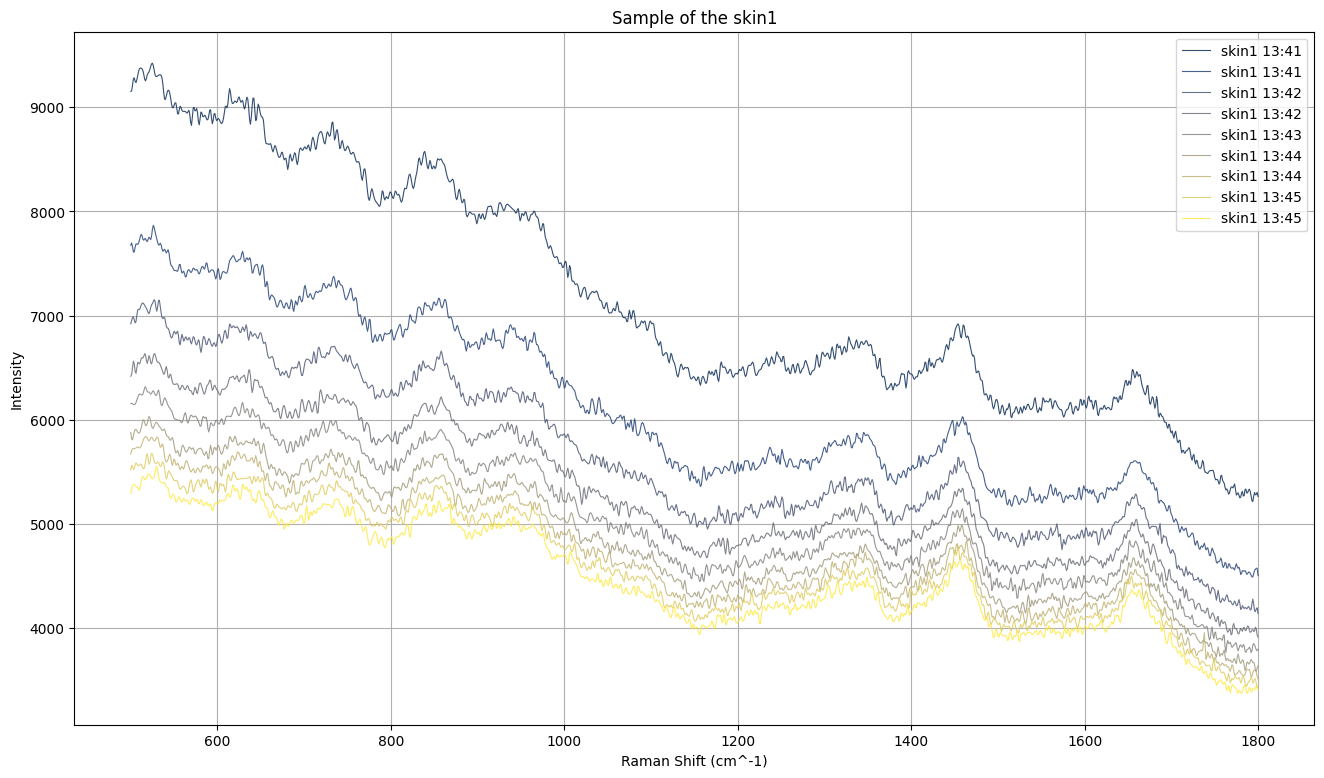

In [2]:
DATA_PATH:Path = BASE_PATH.joinpath("data/skin/txt")

plt.figure(figsize=(16,9))
colors = cmap(np.linspace(0, 1, 9))
skin1:list[Sample] = []
for i, path in enumerate(sorted(list(DATA_PATH.glob("skin1*.txt")))):
    print(i, path)
    sample = read_txt(path=path, verbose=True)
    sample.extract_range(low=500, high=1800)
    skin1.append(sample)
    sample.plot(label=f"{sample.name} {sample.date.strftime('%H:%M')}", color=colors[i])

plt.title("Sample of the skin1")
plt.legend()
add_plot_label()
plt.show()

We can see that the intensity keep decreasing after each measurement.

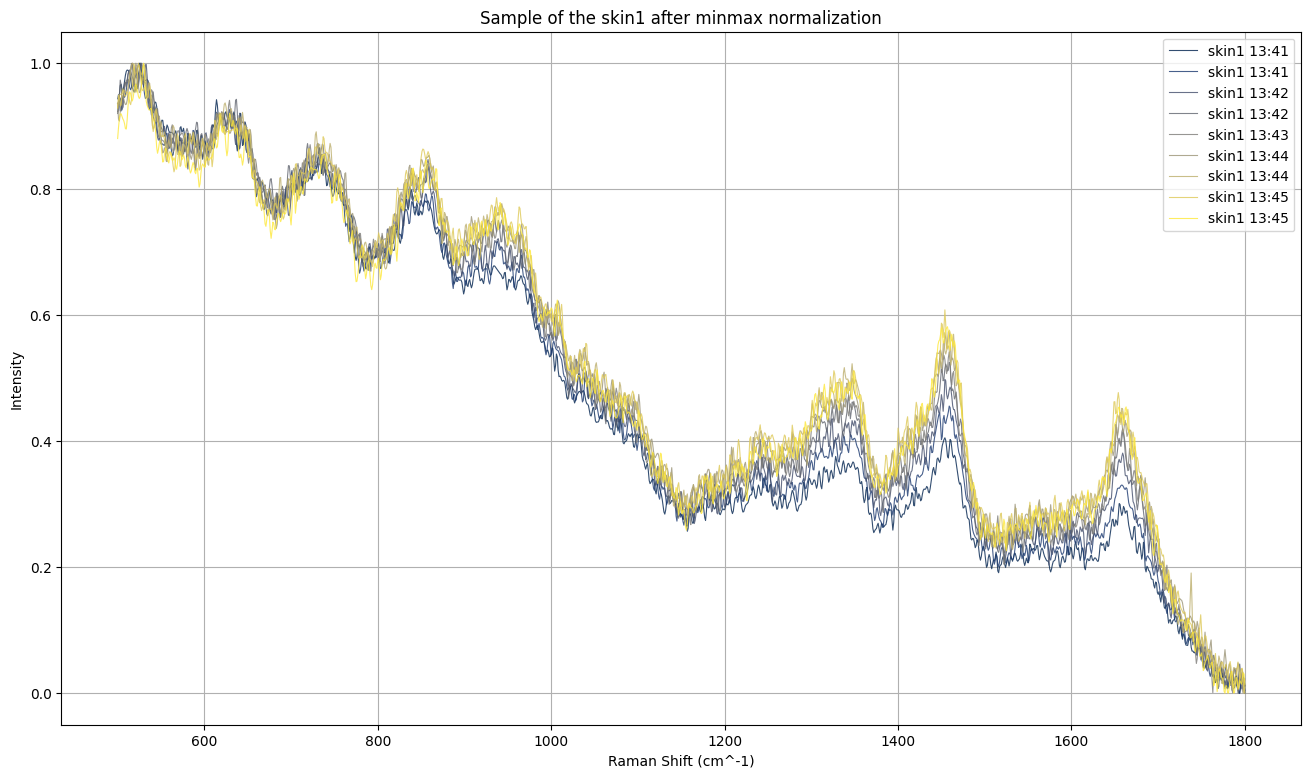

In [3]:
plt.figure(figsize=(16,9))
for i, sample in enumerate(skin1):
    sample.normalized(method='minmax')
    sample.plot(label=f"{sample.name} {sample.date.strftime('%H:%M')}", color=colors[i])
plt.title("Sample of the skin1 after minmax normalization")
plt.legend()
add_plot_label()
plt.show()

The normalization help to reduce the skin variantion.

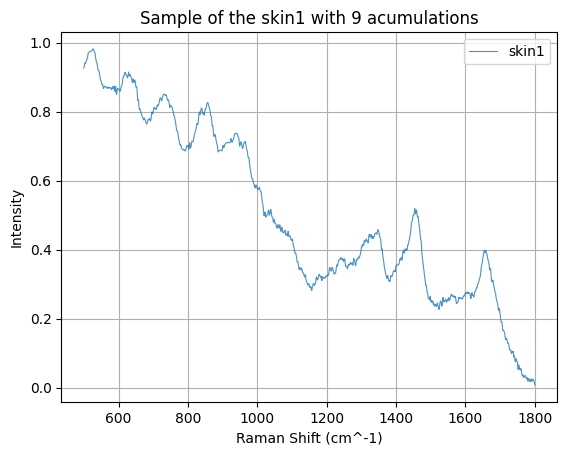

In [4]:
skin1 = accumulate(skin1)
skin1.plot()
plt.title("Sample of the skin1 with 9 acumulations")
plt.legend()
add_plot_label()
plt.show()

## 2. Skin2

The laser's focus is moved to other spot on the same skin.

0 /app/data/skin/txt/skin2_600_785 nm_30 s_1_2024_12_09_13_46_52_01.txt
1 /app/data/skin/txt/skin2_600_785 nm_30 s_1_2024_12_09_13_47_25_01.txt
2 /app/data/skin/txt/skin2_600_785 nm_30 s_1_2024_12_09_13_47_57_01.txt
3 /app/data/skin/txt/skin2_600_785 nm_30 s_1_2024_12_09_13_48_29_01.txt
Found 2 spike(s) in path=/app/data/skin/txt/skin2_600_785 nm_30 s_1_2024_12_09_13_48_29_01.txt, self.remove_spike() is perform automatically.
4 /app/data/skin/txt/skin2_600_785 nm_30 s_1_2024_12_09_13_49_02_01.txt
5 /app/data/skin/txt/skin2_600_785 nm_30 s_1_2024_12_09_13_49_33_01.txt
6 /app/data/skin/txt/skin2_600_785 nm_30 s_1_2024_12_09_13_50_05_01.txt
7 /app/data/skin/txt/skin2_600_785 nm_30 s_1_2024_12_09_13_50_36_01.txt
8 /app/data/skin/txt/skin2_600_785 nm_30 s_1_2024_12_09_13_51_10_01.txt
Found 1 spike(s) in path=/app/data/skin/txt/skin2_600_785 nm_30 s_1_2024_12_09_13_51_10_01.txt, self.remove_spike() is perform automatically.
9 /app/data/skin/txt/skin2_600_785 nm_30 s_1_2024_12_09_13_51_43_01.

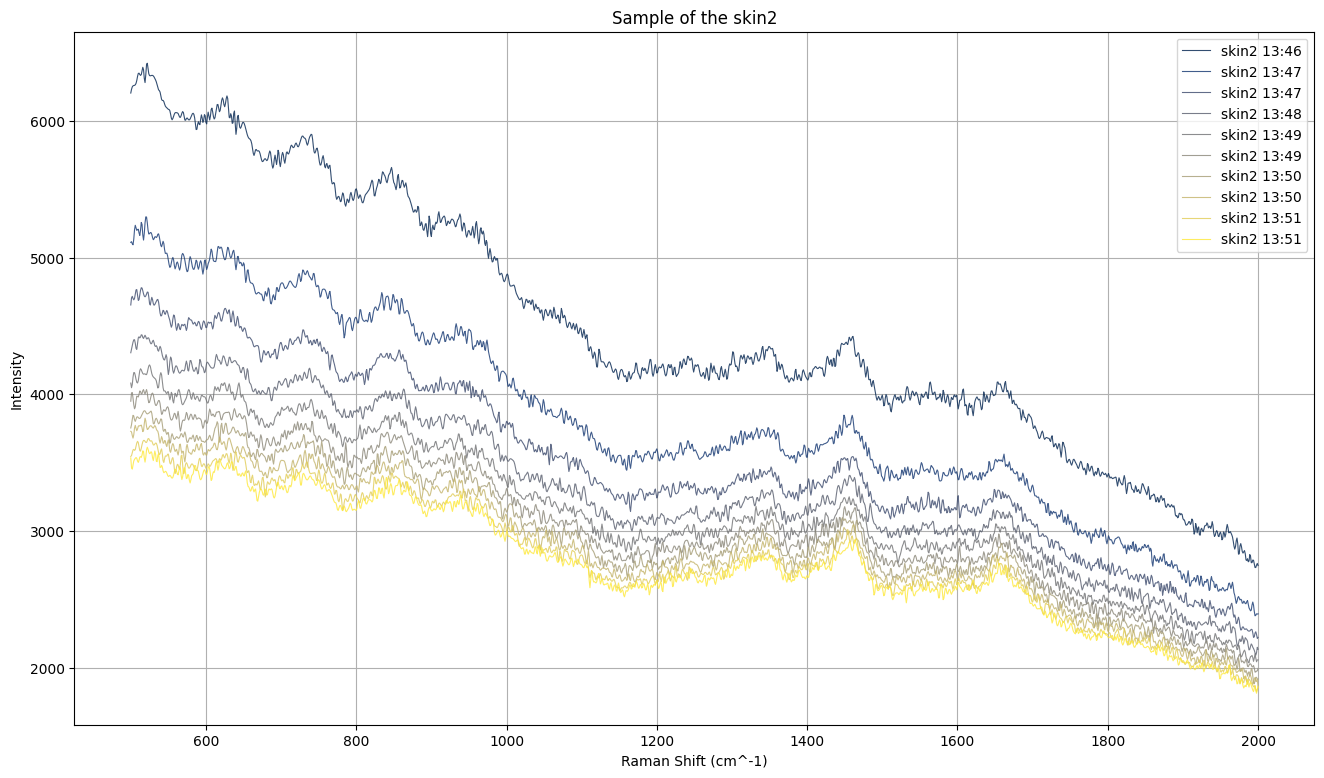

In [5]:
DATA_PATH:Path = BASE_PATH.joinpath("data/skin/txt")
plt.figure(figsize=(16,9))
colors = cmap(np.linspace(0, 1, 10))
skin2:list[Sample] = []
for i, path in enumerate(sorted(list(DATA_PATH.glob("skin2*.txt")))):
    print(i, path)
    sample = read_txt(path=path, verbose=True)
    sample.extract_range(low=500, high=2000)
    skin2.append(sample)
    sample.plot(label=f"{sample.name} {sample.date.strftime('%H:%M')}", color=colors[i])

plt.title("Sample of the skin2")
plt.legend()
add_plot_label()
plt.show()

The same decreasing behavior is exhibit here too.

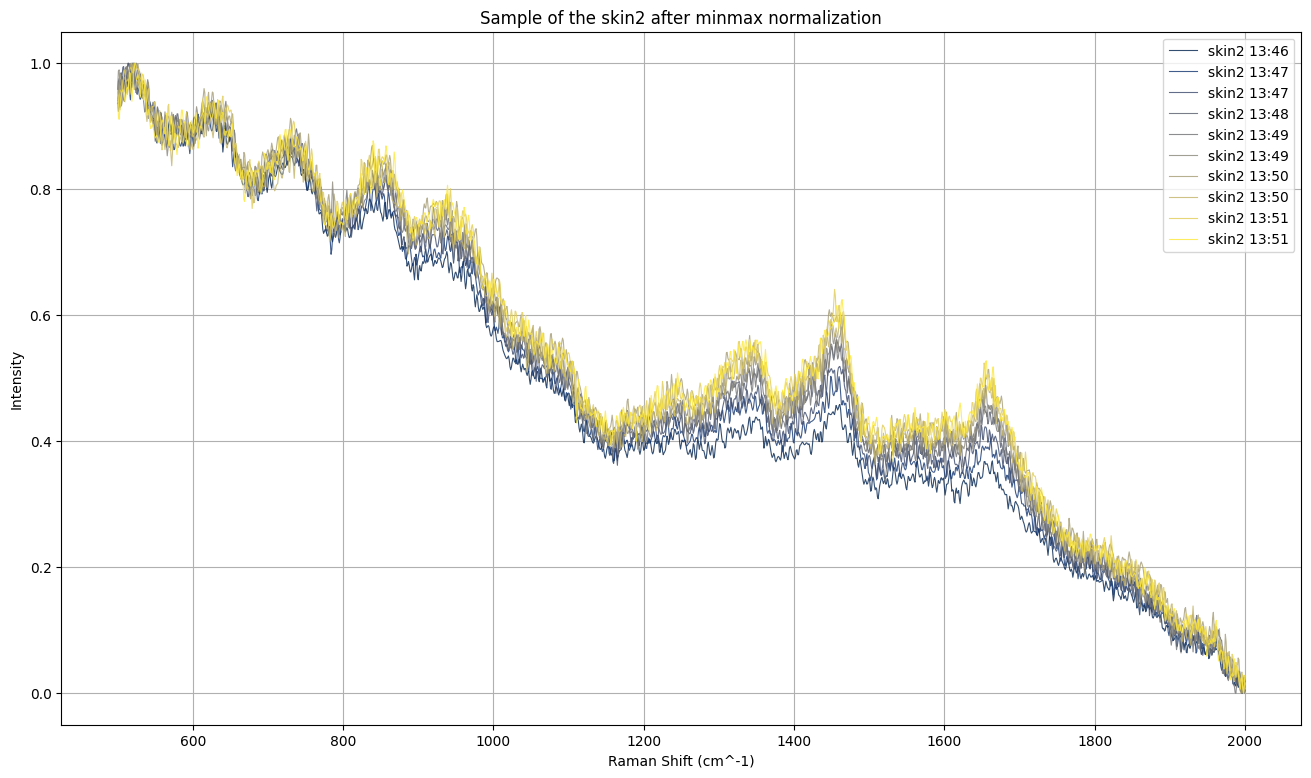

In [6]:
plt.figure(figsize=(16,9))
for i, sample in enumerate(skin2):
    sample.normalized(method='minmax')
    sample.plot(label=f"{sample.name} {sample.date.strftime('%H:%M')}", color=colors[i])
plt.title("Sample of the skin2 after minmax normalization")
plt.legend()
add_plot_label()
plt.show()

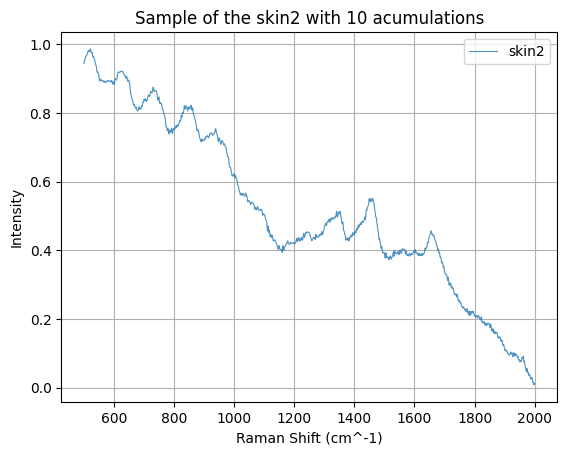

In [7]:
skin2 = accumulate(skin2)
skin2.plot()
plt.title("Sample of the skin2 with 10 acumulations")
plt.legend()
add_plot_label()
plt.show()

## 3. Compare the two spots

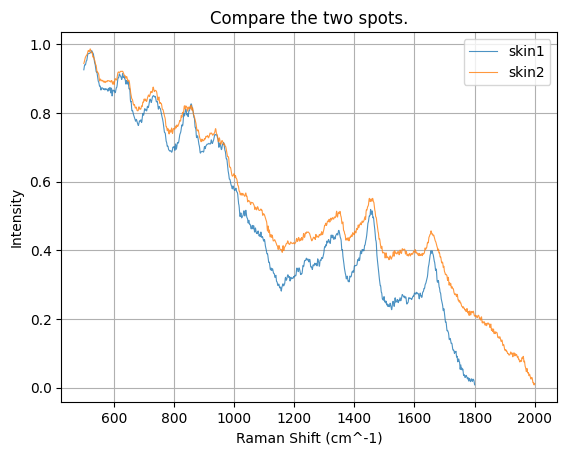

In [8]:
skin1.plot()
skin2.plot()
plt.title("Compare the two spots.")
plt.legend()
add_plot_label()
plt.show()

## 4. Skin3

The decreasing of scattering intensity could be the result of a damaged sample.

`skin3-1` and `skin3-2` is the same spot but collected at 10 minutes apart.

0 /app/data/skin/txt/skin3-1_600_785 nm_30 s_1_2024_12_09_13_52_41_01.txt
Found 2 spike(s) in path=/app/data/skin/txt/skin3-1_600_785 nm_30 s_1_2024_12_09_13_52_41_01.txt, self.remove_spike() is perform automatically.
1 /app/data/skin/txt/skin3-1_600_785 nm_30 s_1_2024_12_09_13_53_13_01.txt
Found 2 spike(s) in path=/app/data/skin/txt/skin3-1_600_785 nm_30 s_1_2024_12_09_13_53_13_01.txt, self.remove_spike() is perform automatically.
2 /app/data/skin/txt/skin3-1_600_785 nm_30 s_1_2024_12_09_13_53_44_01.txt
Found 4 spike(s) in path=/app/data/skin/txt/skin3-1_600_785 nm_30 s_1_2024_12_09_13_53_44_01.txt, self.remove_spike() is perform automatically.
3 /app/data/skin/txt/skin3-1_600_785 nm_30 s_1_2024_12_09_13_54_16_01.txt
Found 2 spike(s) in path=/app/data/skin/txt/skin3-1_600_785 nm_30 s_1_2024_12_09_13_54_16_01.txt, self.remove_spike() is perform automatically.
4 /app/data/skin/txt/skin3-1_600_785 nm_30 s_1_2024_12_09_13_54_46_01.txt
Found 1 spike(s) in path=/app/data/skin/txt/skin3-1_60

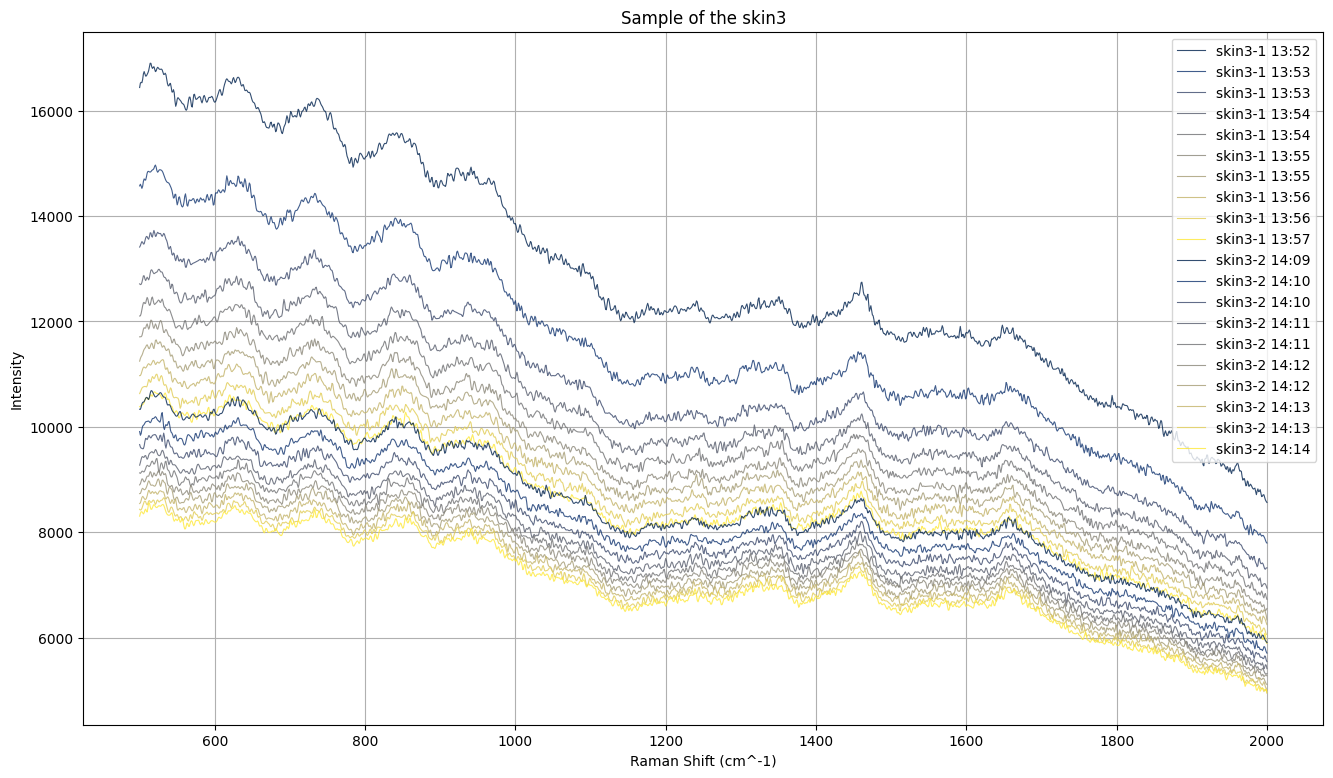

In [9]:
DATA_PATH:Path = BASE_PATH.joinpath("data/skin/txt")

plt.figure(figsize=(16,9))
colors = cmap(np.linspace(0, 1, 10))
skin3:list[Sample] = []
for i, path in enumerate(sorted(list(DATA_PATH.glob("skin3*.txt")))):
    print(i, path)
    sample = read_txt(path=path, verbose=True)
    sample.extract_range(low=500, high=2000)
    skin3.append(sample)
    sample.plot(label=f"{sample.name} {sample.date.strftime('%H:%M')}", color=colors[i%10])
plt.title("Sample of the skin3")
plt.legend()
add_plot_label()
plt.show()

Even after 10 minutes apart, the baseline continue right from where we stop.

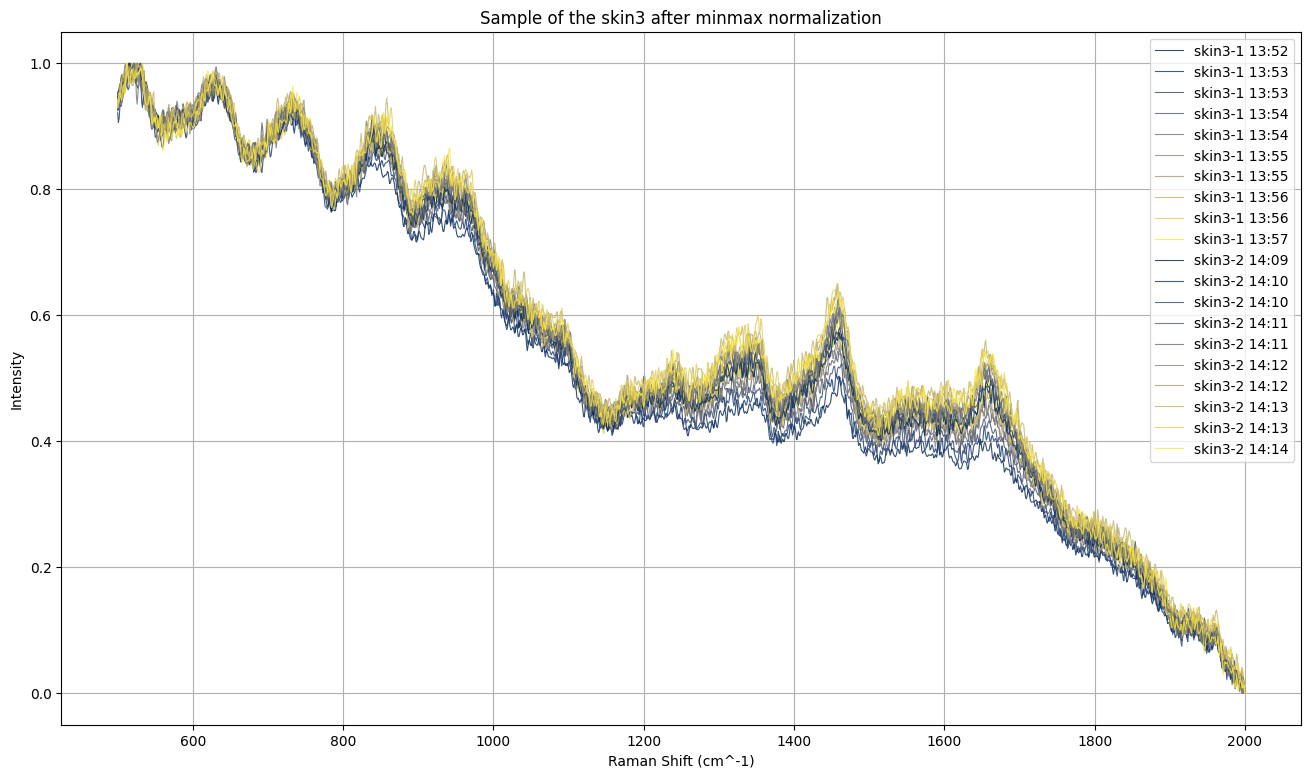

In [10]:
colors = cmap(np.linspace(0, 1, 10))
plt.figure(figsize=(16,9))
for i, sample in enumerate(skin3):
    sample.normalized(method='minmax')
    sample.plot(label=f"{sample.name} {sample.date.strftime('%H:%M')}", color=colors[i%10])
plt.title("Sample of the skin3 after minmax normalization")
plt.legend()
add_plot_label()
plt.show()

It seems that there is a variation in the region of 1100 to 1700 cm^-1 that is followings the collection time.

Let's plot with contour color following the datetime of the collection.

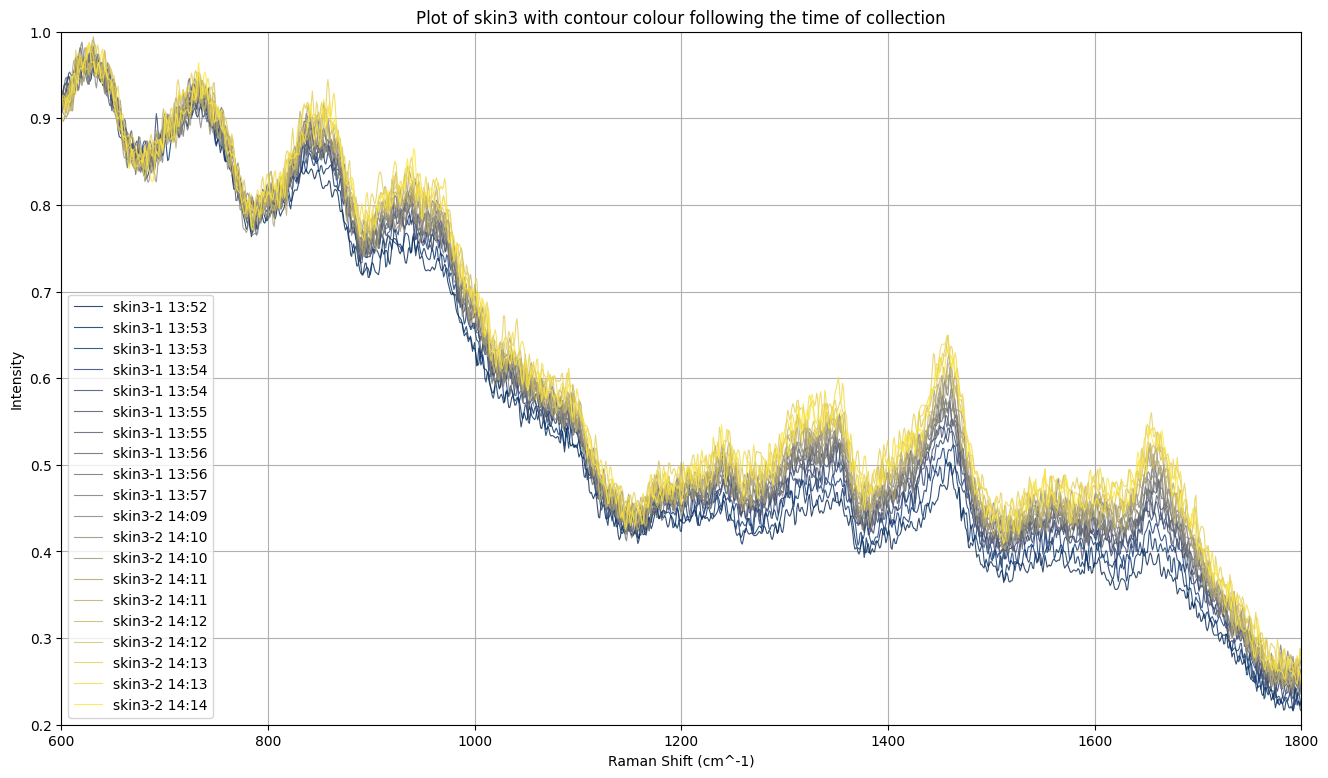

In [11]:
colors = cmap(np.linspace(0, 1, 20))

plt.figure(figsize=(16,9))
plt.title(f"Plot of skin3 with contour colour following the time of collection")
for i, sample in enumerate(skin3):
    sample.plot(label=f"{sample.name} {sample.date.strftime('%H:%M')}", color=colors[i])
plt.xlim(600,1800)
plt.ylim(0.2,1)
plt.legend()
add_plot_label()
plt.show()

It is clear from every `skin` measurements that the scattering from 800 to 1800 has variation different following the time of collection.

This variation could be the degradaton of samples from being exposed to the laser at 350 mW for 30 seconds (each collection).

Let's see if we can futhur reduce the variation if we limite the Raman Shift to a narrower range.

## Limit the range to 900 - 1600

900 - 1600 is the range that we used for Glucose concentration prediction.

0 /app/data/skin/txt/skin1_600_785 nm_30 s_1_2024_12_09_13_41_06_01.txt
Found 1 spike(s) in path=/app/data/skin/txt/skin1_600_785 nm_30 s_1_2024_12_09_13_41_06_01.txt, self.remove_spike() is perform automatically.
1 /app/data/skin/txt/skin1_600_785 nm_30 s_1_2024_12_09_13_41_45_01.txt
Found 2 spike(s) in path=/app/data/skin/txt/skin1_600_785 nm_30 s_1_2024_12_09_13_41_45_01.txt, self.remove_spike() is perform automatically.
2 /app/data/skin/txt/skin1_600_785 nm_30 s_1_2024_12_09_13_42_18_01.txt
Found 1 spike(s) in path=/app/data/skin/txt/skin1_600_785 nm_30 s_1_2024_12_09_13_42_18_01.txt, self.remove_spike() is perform automatically.
3 /app/data/skin/txt/skin1_600_785 nm_30 s_1_2024_12_09_13_42_50_01.txt
Found 1 spike(s) in path=/app/data/skin/txt/skin1_600_785 nm_30 s_1_2024_12_09_13_42_50_01.txt, self.remove_spike() is perform automatically.
4 /app/data/skin/txt/skin1_600_785 nm_30 s_1_2024_12_09_13_43_25_01.txt
Found 2 spike(s) in path=/app/data/skin/txt/skin1_600_785 nm_30 s_1_2024

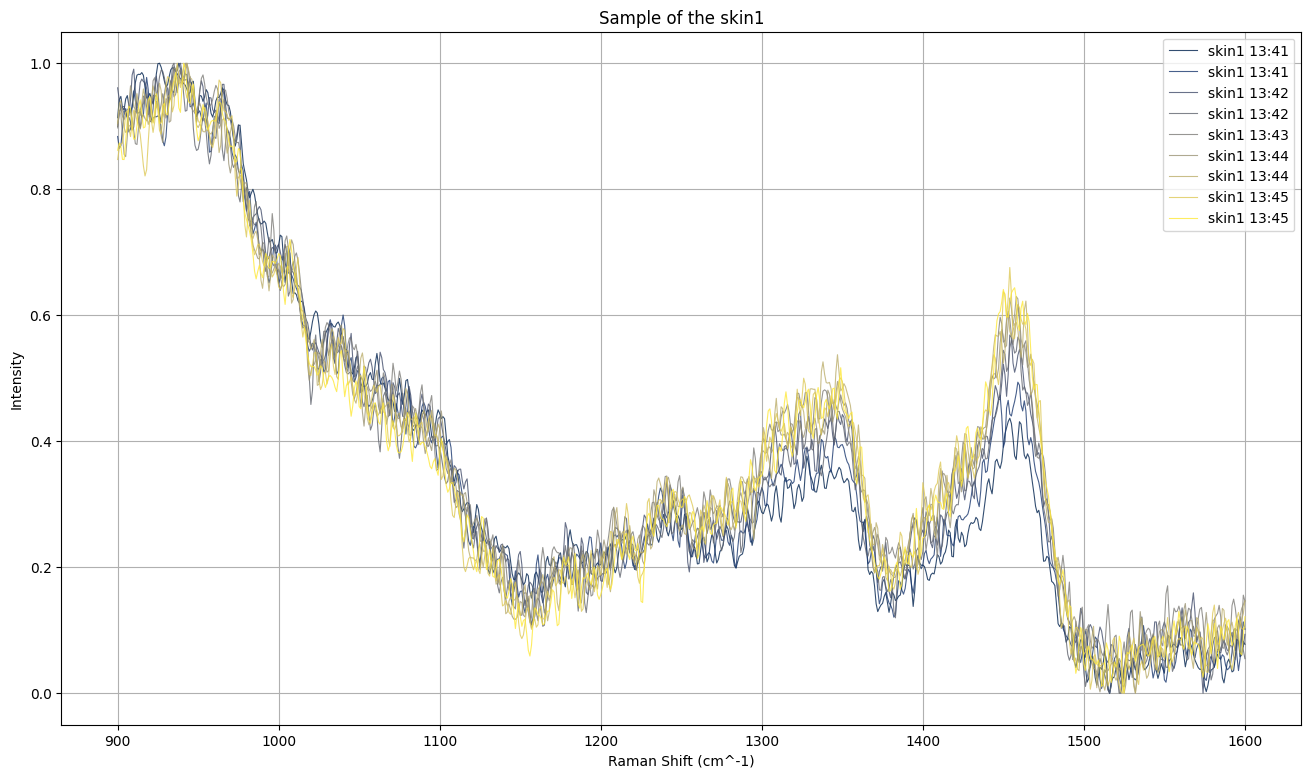

In [12]:
DATA_PATH:Path = BASE_PATH.joinpath("data/skin/txt")

plt.figure(figsize=(16,9))
colors = cmap(np.linspace(0, 1, 9))
skin1:list[Sample] = []
for i, path in enumerate(sorted(list(DATA_PATH.glob("skin1*.txt")))):
    print(i, path)
    sample = read_txt(path=path, verbose=True)
    sample.extract_range(low=900, high=1600)
    sample.normalized(method='minmax')
    skin1.append(sample)
    sample.plot(label=f"{sample.name} {sample.date.strftime('%H:%M')}", color=colors[i])

plt.title("Sample of the skin1")
plt.legend()
add_plot_label()
plt.show()

0 /app/data/skin/txt/skin2_600_785 nm_30 s_1_2024_12_09_13_46_52_01.txt
1 /app/data/skin/txt/skin2_600_785 nm_30 s_1_2024_12_09_13_47_25_01.txt
2 /app/data/skin/txt/skin2_600_785 nm_30 s_1_2024_12_09_13_47_57_01.txt
3 /app/data/skin/txt/skin2_600_785 nm_30 s_1_2024_12_09_13_48_29_01.txt
Found 2 spike(s) in path=/app/data/skin/txt/skin2_600_785 nm_30 s_1_2024_12_09_13_48_29_01.txt, self.remove_spike() is perform automatically.
4 /app/data/skin/txt/skin2_600_785 nm_30 s_1_2024_12_09_13_49_02_01.txt
5 /app/data/skin/txt/skin2_600_785 nm_30 s_1_2024_12_09_13_49_33_01.txt
6 /app/data/skin/txt/skin2_600_785 nm_30 s_1_2024_12_09_13_50_05_01.txt
7 /app/data/skin/txt/skin2_600_785 nm_30 s_1_2024_12_09_13_50_36_01.txt
8 /app/data/skin/txt/skin2_600_785 nm_30 s_1_2024_12_09_13_51_10_01.txt
Found 1 spike(s) in path=/app/data/skin/txt/skin2_600_785 nm_30 s_1_2024_12_09_13_51_10_01.txt, self.remove_spike() is perform automatically.
9 /app/data/skin/txt/skin2_600_785 nm_30 s_1_2024_12_09_13_51_43_01.

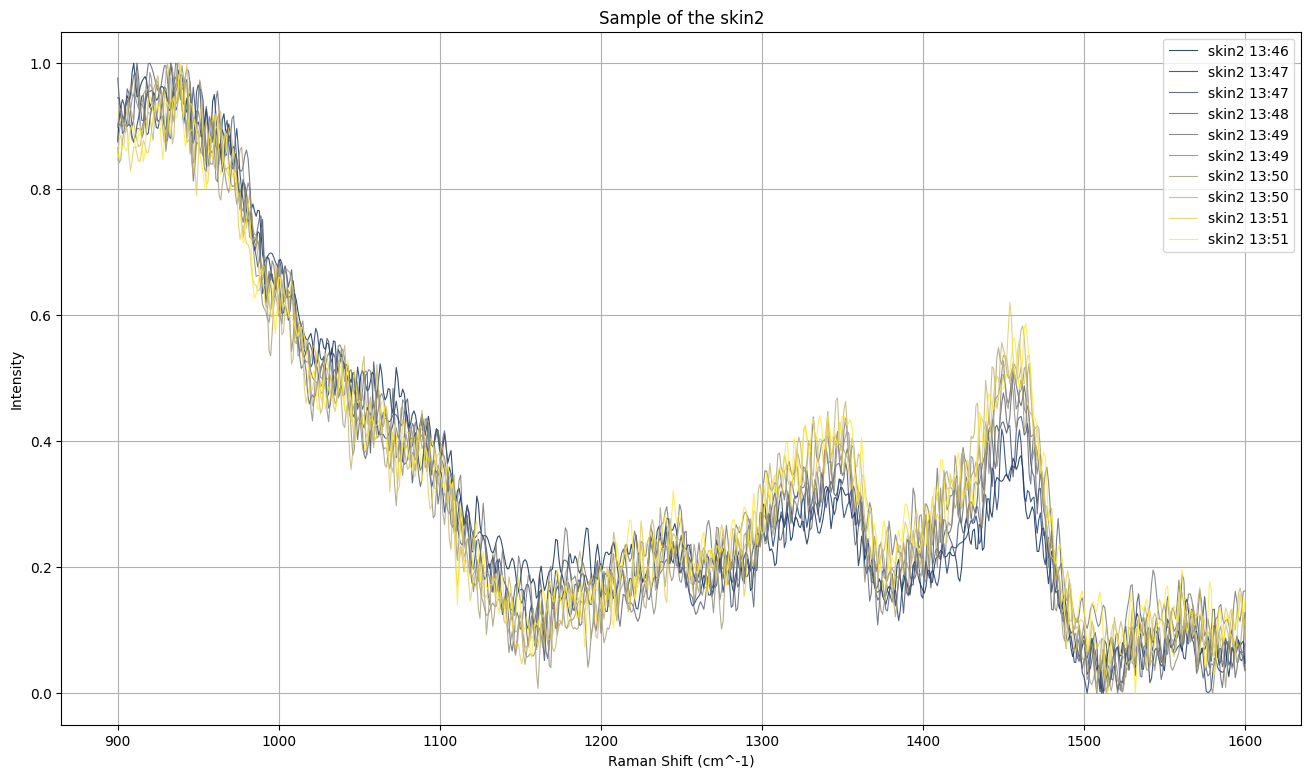

In [13]:
DATA_PATH:Path = BASE_PATH.joinpath("data/skin/txt")

plt.figure(figsize=(16,9))
colors = cmap(np.linspace(0, 1, 10))
skin2:list[Sample] = []
for i, path in enumerate(sorted(list(DATA_PATH.glob("skin2*.txt")))):
    print(i, path)
    sample = read_txt(path=path, verbose=True)
    sample.extract_range(low=900, high=1600)
    sample.normalized(method='minmax')
    skin2.append(sample)
    sample.plot(label=f"{sample.name} {sample.date.strftime('%H:%M')}", color=colors[i])

plt.title("Sample of the skin2")
plt.legend()
add_plot_label()
plt.show()

0 /app/data/skin/txt/skin3-1_600_785 nm_30 s_1_2024_12_09_13_52_41_01.txt
Found 2 spike(s) in path=/app/data/skin/txt/skin3-1_600_785 nm_30 s_1_2024_12_09_13_52_41_01.txt, self.remove_spike() is perform automatically.
1 /app/data/skin/txt/skin3-1_600_785 nm_30 s_1_2024_12_09_13_53_13_01.txt
Found 2 spike(s) in path=/app/data/skin/txt/skin3-1_600_785 nm_30 s_1_2024_12_09_13_53_13_01.txt, self.remove_spike() is perform automatically.
2 /app/data/skin/txt/skin3-1_600_785 nm_30 s_1_2024_12_09_13_53_44_01.txt
Found 4 spike(s) in path=/app/data/skin/txt/skin3-1_600_785 nm_30 s_1_2024_12_09_13_53_44_01.txt, self.remove_spike() is perform automatically.
3 /app/data/skin/txt/skin3-1_600_785 nm_30 s_1_2024_12_09_13_54_16_01.txt
Found 2 spike(s) in path=/app/data/skin/txt/skin3-1_600_785 nm_30 s_1_2024_12_09_13_54_16_01.txt, self.remove_spike() is perform automatically.
4 /app/data/skin/txt/skin3-1_600_785 nm_30 s_1_2024_12_09_13_54_46_01.txt
Found 1 spike(s) in path=/app/data/skin/txt/skin3-1_60

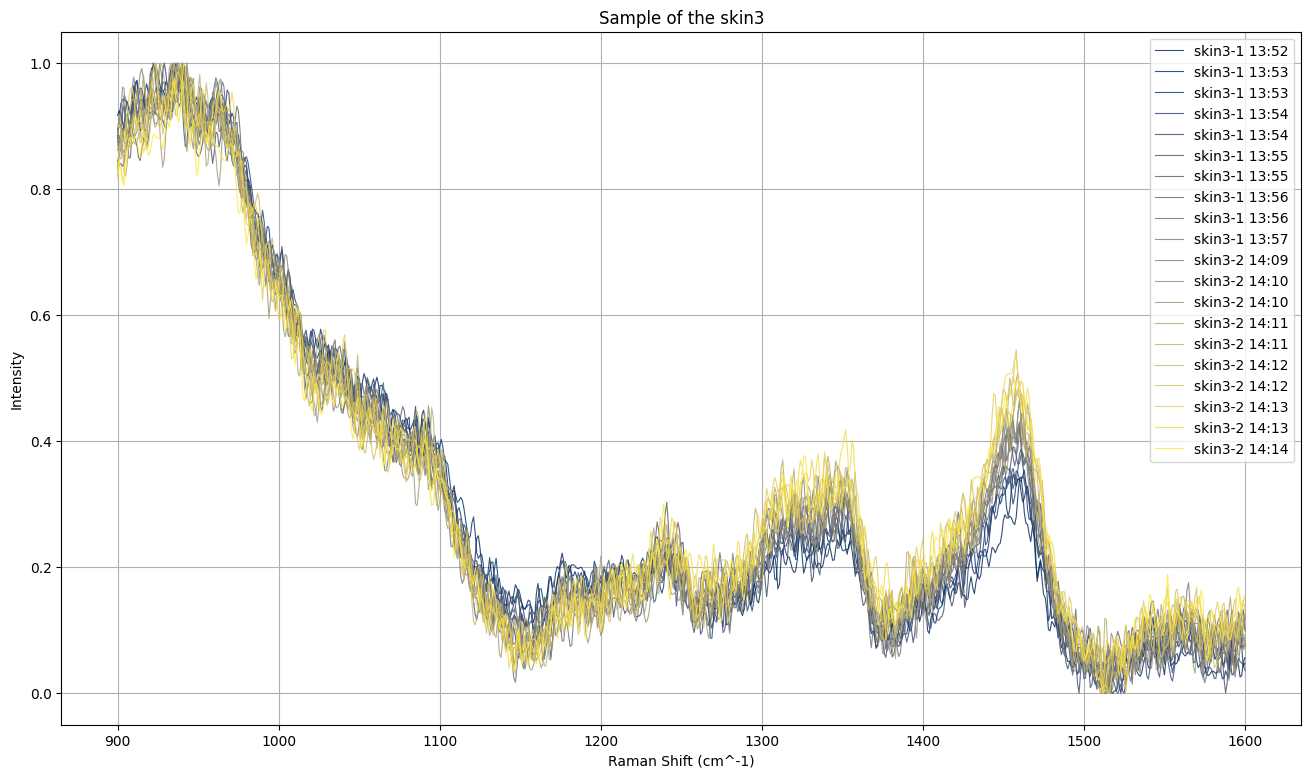

In [14]:
DATA_PATH:Path = BASE_PATH.joinpath("data/skin/txt")

plt.figure(figsize=(16,9))
colors = cmap(np.linspace(0, 1, 20))
skin3:list[Sample] = []
for i, path in enumerate(sorted(list(DATA_PATH.glob("skin3*.txt")))):
    print(i, path)
    sample = read_txt(path=path, verbose=True)
    sample.extract_range(low=900, high=1600)
    sample.normalized(method='minmax')
    skin3.append(sample)
    sample.plot(label=f"{sample.name} {sample.date.strftime('%H:%M')}", color=colors[i])

plt.title("Sample of the skin3")
plt.legend()
add_plot_label()
plt.show()

It seems that these variation can be seen as a baseline problem.

The degradation effect the scattering differently at different region.

## 5. Compare each skin

In [15]:
skin1 = accumulate(skin1)
skin2 = accumulate(skin2)
skin31 = accumulate([sample for sample in skin3 if (sample.name == 'skin3-1')])
skin32 = accumulate([sample for sample in skin3 if (sample.name == 'skin3-2')])

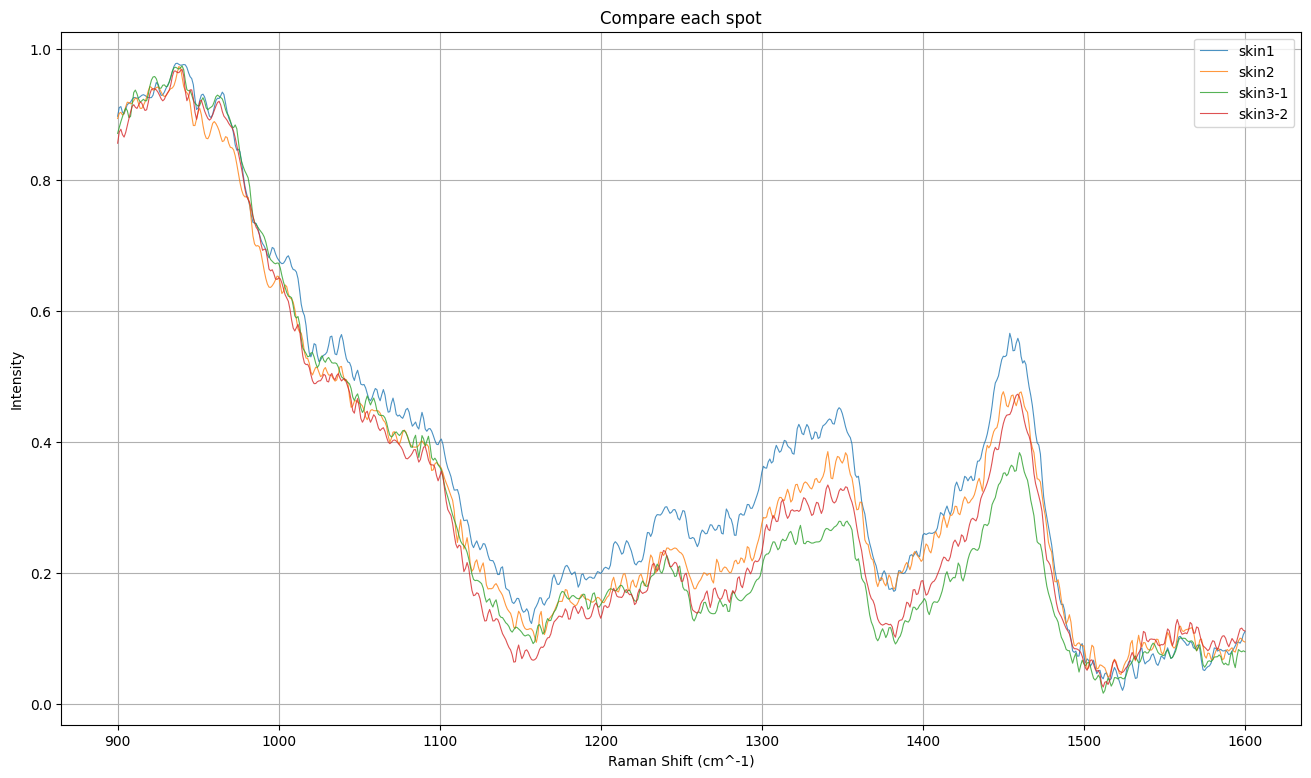

In [16]:
plt.figure(figsize=(16,9))
skin1.plot()
skin2.plot()
skin31.plot()
skin32.plot()
plt.title("Compare each spot")
plt.legend()
add_plot_label()
plt.show()